In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model  import Ridge,Lasso,RidgeCV,LassoCV
import pickle
%matplotlib inline
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error


In [4]:
data=pd.read_csv("C:/Users/91954/data science pg program/happiness_score_dataset.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
X=data.drop(columns=['Country'])


In [8]:
Y=X.drop(columns=['Region'])
Y.tail()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

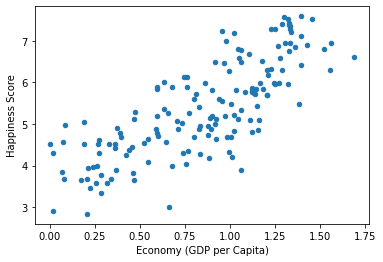

In [9]:
data.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score')


we can see that here is apositive relation ship between them and happiness score increses with increase in economy

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

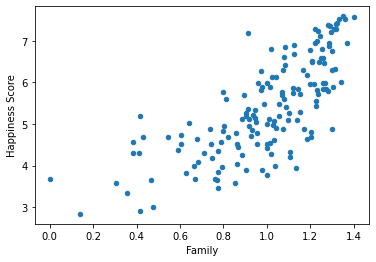

In [10]:
data.plot(kind='scatter',x='Family',y='Happiness Score')


we can see that here is apositive relation ship between them and happiness score increses with increase in family

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

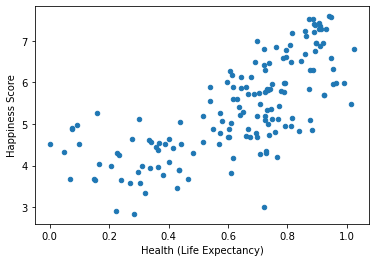

In [11]:
data.plot(kind='scatter',x='Health (Life Expectancy)',y='Happiness Score')

we can see that here is apositive relation ship between them and happiness score increses with increase in health

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

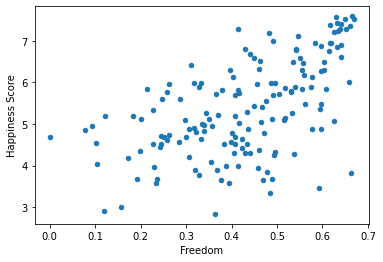

In [12]:
data.plot(kind='scatter',x='Freedom',y='Happiness Score')

we can see that here is apositive relation ship between them and happiness score increses with increase in freedom

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

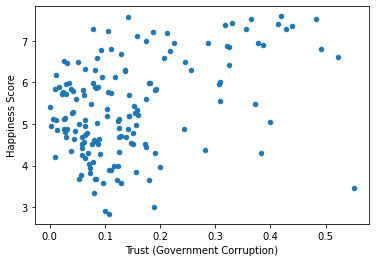

In [13]:
data.plot(kind='scatter',x='Trust (Government Corruption)',y='Happiness Score')

we can see that here relation ship between them are not satisfactory and happiness score is not incresing with increase in trust(government corruption)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

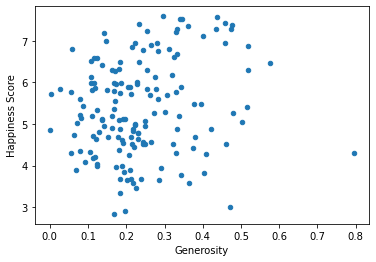

In [14]:
data.plot(kind='scatter',x='Generosity',y='Happiness Score')

we can see that here relation ship between them are not satisfactory and happiness score is not incresing with increase in generosity

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

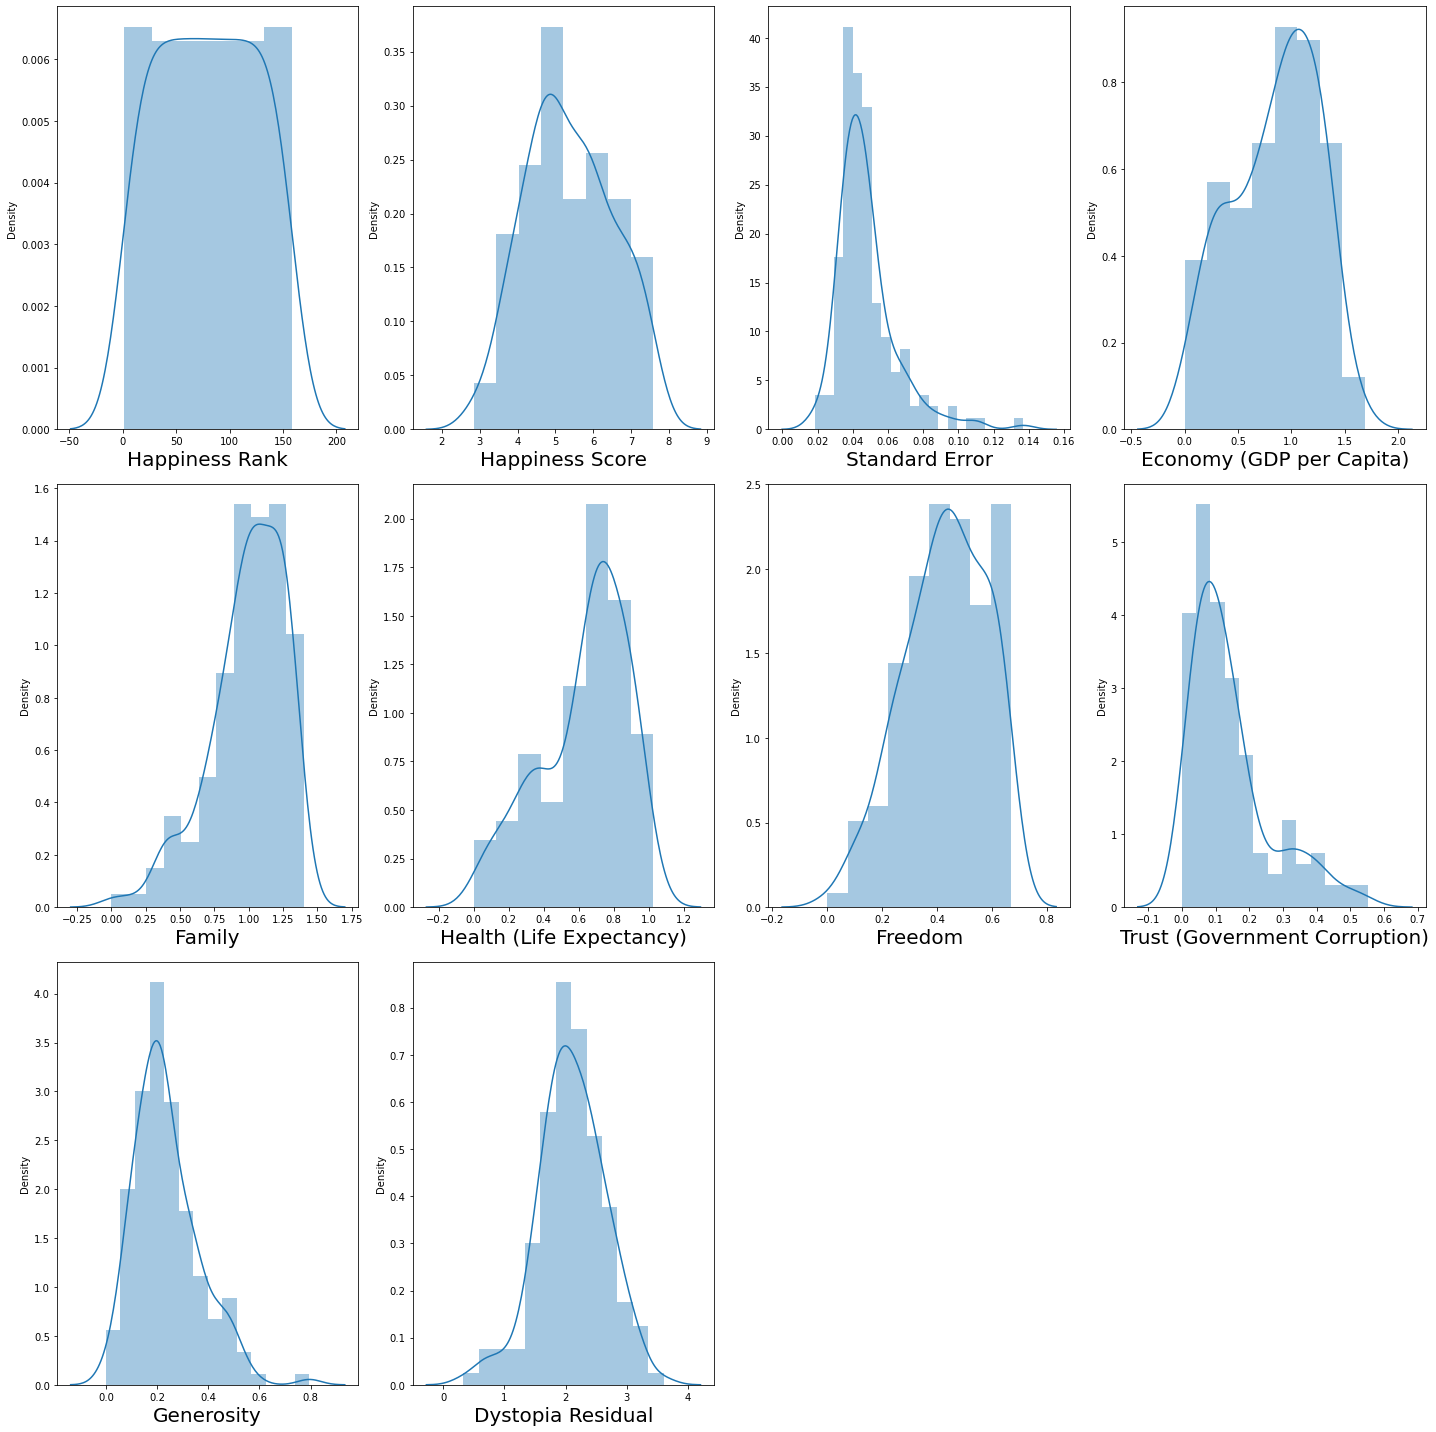

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in Y:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(Y[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [16]:
Y

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
X=Y.drop(['Happiness Score','Happiness Rank','Standard Error'],axis=1)

In [18]:
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
Y=Y['Happiness Score']

In [20]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [21]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.40,random_state=58)


In [23]:
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [24]:
data.tail(2)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [25]:
print(regression.predict(scaler.transform([[0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302]])))

[2.90463807]


In [26]:
filename='happyrepo.pickel'
pickle.dump(regression,open(filename,'wb'))




In [37]:
regression.score(x_test,y_test)



0.9999999069771358

In [28]:
regression.score(x_test,y_test)

0.9999999069771358

In [29]:
y_pred = regression.predict(x_test)

In [30]:
y_pred

array([5.83258895, 5.39865708, 6.26931162, 5.25277067, 5.69524025,
       6.29460814, 5.79056017, 4.5124628 , 5.36042029, 5.95953134,
       4.29266955, 5.68867983, 5.01317685, 5.88985223, 6.66968929,
       7.18744297, 3.93085501, 5.21190264, 4.78656878, 4.79945222,
       5.97533073, 4.97124942, 7.36361296, 5.58864296, 5.71580997,
       4.33185756, 4.41932325, 3.46495861, 4.5178819 , 6.16760363,
       2.90463807, 4.51716339, 5.7543288 , 6.50509779, 4.51447267,
       5.54808971, 5.81249934, 4.34999225, 7.37806229, 6.85290614,
       5.00699645, 6.94013969, 4.94869864, 3.99482889, 4.5716015 ,
       5.12896062, 5.28645785, 3.84513916, 4.68547532, 6.45464175,
       3.90378395, 6.13027619, 5.19228679, 5.47698961, 3.81928256,
       4.29675595, 5.98703504, 3.68095532, 5.19229243, 3.98877068,
       5.77034313, 3.58689312, 3.65501948, 6.78628838])

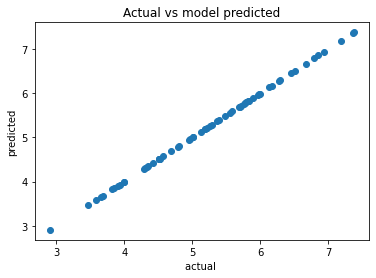

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted')
plt.title('Actual vs model predicted')
plt.show()


In [34]:
mean_absolute_error(y_test,y_pred)


0.0002698773832907203

In [35]:
mean_squared_error(y_test,y_pred)

9.983373635972417e-08

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))#root mean squared error

0.00031596477075731747

In [43]:
#regularization

In [44]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [45]:
alpha=lasscv.alpha_

alpha

9.624267630506577e-05

In [46]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=9.624267630506577e-05)

In [47]:
lasso_reg.score(x_test,y_test)

0.9999999058942947

it is equal to the accuracy score and it prooves it is not overfitting

In [51]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [52]:
ridgecv.alpha_

0.001

In [53]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [54]:
ridge_model.score(x_test,y_test)

0.9999999060493503

it is equal to the accuracy score and it prooves it is not overfitting